# EDA

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
path = "/Users/saideepbunny/Projects/Application_Ranking_System"


## Reading the data

In [3]:
df = pd.concat([pd.read_csv(f"{path}/data/sampled_linkedin_jd_skills/sampled_data_v2/sampled_jd_resume_set1.csv"),
      pd.read_csv(f"{path}/data/sampled_linkedin_jd_skills/sampled_data_v2/sampled_jd_resume_set2.csv")])
df

,job_link,last_processed_time,got_summary,got_ner,is_being_worked,job_title,company,job_location,first_seen,search_city,search_country,search_position,job_level,job_type,job_skills,job_summary,id,summary_len,skill_count
0,https://uk.linkedin.com/jobs/view/audit-manage...,2024-01-19 09:45:09.215838+00,t,t,f,Audit Manager,ACCA Careers,"Stevenage, England, United Kingdom",2024-01-13,Luton,United Kingdom,Director Stage,Mid senior,Onsite,"Audit, Financial statements, FRS102, IFRS, Acc...",Menzies LLP\nWe are looking for an experienced...,339382,6142,25
1,https://www.linkedin.com/jobs/view/audit-manag...,2024-01-19 15:33:11.588617+00,t,t,f,Audit Manager,Baker Tilly US,"Minneapolis, MN",2024-01-15,Orono,United States,Baker,Mid senior,Onsite,"Accounting, Auditing, Assurance services, Fina...","Overview\nBaker Tilly US, LLP (Baker Tilly) is...",70598,5769,26
2,https://www.linkedin.com/jobs/view/audit-manag...,2024-01-19 09:45:09.215838+00,t,t,f,Audit Manager,KORE1,"Cincinnati, OH",2024-01-12,Cincinnati,United States,Auditor,Mid senior,Onsite,"Internal Audit Manager, Riskbased audit progra...","KORE1, a nationwide provider of staffing and r...",25866,5263,51
3,https://www.linkedin.com/jobs/view/audit-manag...,2024-01-19 09:45:09.215838+00,t,t,f,Audit Manager,Jobot,"Cheyenne, WY",2024-01-12,Wyoming,United States,Auditor,Mid senior,Onsite,"Audit, Leadership, Client Relationships, Strat...",Want to learn more about this role and Jobot? ...,561971,5066,30
4,https://uk.linkedin.com/jobs/view/audit-manage...,2024-01-20 06:56:42.454545+00,t,t,f,Audit Manager,Bishop Fleming Chartered Accountants,"Bristol, England, United Kingdom",2024-01-14,Bristol,United Kingdom,Tier,Mid senior,Onsite,"Audit, Assurance, Accounting, Business Develop...",Description\nLocation: Bristol\nAbout The Role...,885770,4917,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,https://www.linkedin.com/jobs/view/test-engine...,2024-01-19 20:05:43.91119+00,t,t,f,Test Engineer,Stoke Space,"Moses Lake, WA",2024-01-14,Ephrata,United States,Agricultural-Research Engineer,Mid senior,Onsite,"Fluid systems, Mechanical systems, Instrumenta...",A thriving economy in space is needed to make ...,14991,4365,15
246,https://www.linkedin.com/jobs/view/test-engine...,2024-01-19 09:45:09.215838+00,t,t,f,Test Engineer,Akkodis,"Tempe, AZ",2024-01-12,Canyon,United States,Agricultural-Research Engineer,Associate,Onsite,"Aerospace, Mechanical test environment, Mechan...",Akkodis is seeking a Test Engineer for a posit...,189702,3999,33
247,https://www.linkedin.com/jobs/view/test-engine...,2024-01-19 09:45:09.215838+00,t,t,f,Test Engineer,nFocus Solutions®,"Orlando, FL",2024-01-13,Avondale,United States,Computer Operator,Mid senior,Onsite,"Agile Software Development, System Testing, Te...",Role Summary\nWork within an Agile Software De...,16993,3581,28
248,https://www.linkedin.com/jobs/view/test-engine...,2024-01-19 09:45:09.215838+00,t,t,f,Test Engineer,Micross Components,"Los Alamitos, CA",2024-01-12,Pasadena,United States,Agricultural-Research Engineer,Associate,Onsite,"Semiconductor Testing, Automated Test Equipmen...","Job Summary:\nPerforms LAT testing, builds bur...",568816,3510,40


In [4]:
print("Number of rows in the dataset:", df.shape[0])
print("Number of columns in the dataset:", df.shape[1])

Number of rows in the dataset: 500
Number of columns in the dataset: 19


### Overview of the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 249
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_link             500 non-null    object
 1   last_processed_time  500 non-null    object
 2   got_summary          500 non-null    object
 3   got_ner              500 non-null    object
 4   is_being_worked      500 non-null    object
 5   job_title            500 non-null    object
 6   company              500 non-null    object
 7   job_location         500 non-null    object
 8   first_seen           500 non-null    object
 9   search_city          500 non-null    object
 10  search_country       500 non-null    object
 11  search_position      500 non-null    object
 12  job_level            500 non-null    object
 13  job_type             500 non-null    object
 14  job_skills           500 non-null    object
 15  job_summary          500 non-null    object
 16  id           

### Null value report

In [6]:
def null_value_report(df):
    missing = pd.DataFrame(df.isna().sum()).reset_index().rename(columns={"index": "column", 0:"Count"})
    missing['Percentage'] = missing['Count'] / df.shape[0] * 100
    display(missing)

In [7]:
null_value_report(df)

,column,Count,Percentage
0,job_link,0,0.0
1,last_processed_time,0,0.0
2,got_summary,0,0.0
3,got_ner,0,0.0
4,is_being_worked,0,0.0
5,job_title,0,0.0
6,company,0,0.0
7,job_location,0,0.0
8,first_seen,0,0.0
9,search_city,0,0.0


## Categorizing columns

In [8]:
def get_cardinality(df):
    unique = pd.DataFrame(df.nunique()).reset_index().rename(columns={"index": "column", 0:"Count"})
    unique['Unique Percentage'] = unique['Count'] / df.shape[0] * 100
    display(unique)

In [9]:
get_cardinality(df)

,column,Count,Unique Percentage
0,job_link,500,100.0
1,last_processed_time,210,42.0
2,got_summary,1,0.2
3,got_ner,1,0.2
4,is_being_worked,1,0.2
5,job_title,50,10.0
6,company,452,90.4
7,job_location,328,65.6
8,first_seen,6,1.2
9,search_city,275,55.0


In [10]:
df[['job_title', 'company']].groupby(['job_title', 'company']).value_counts().reset_index()

,job_title,company,count
0,Audit Manager,ACCA Careers,1
1,Audit Manager,Baker Tilly US,1
2,Audit Manager,Bishop Fleming Chartered Accountants,1
3,Audit Manager,Citrin Cooperman,1
4,Audit Manager,DWC CPAs and Advisors,1
...,...,...,...
495,Test Engineer,NextGen Federal Systems,1
496,Test Engineer,Odyssey Systems,1
497,Test Engineer,SEGULA Technologies,1
498,Test Engineer,Stoke Space,1


In [11]:
ignore_columns = ["job_link", "last_processed_time", "got_summary", "got_ner", "is_being_worked", "id", "first_seen"]
numerical_columns = ["summary_len", "skill_count"]

categorical_columns = ["job_title", "company", "job_location", "search_city", "search_country", "search_position", "job_level", "job_type"]
text_columns = ["job_skills", "job_summary"]

In [12]:
assert(len(numerical_columns + categorical_columns + text_columns + ignore_columns) == df.shape[1])

In [13]:
print("Number of Numerical columns:", len(numerical_columns))
print("Number of Categorical columns:", len(categorical_columns))
print("Number of Text columns:", len(text_columns))

Number of Numerical columns: 2
Number of Categorical columns: 8
Number of Text columns: 2


## EDA

### Numerical columns

#### Null value report

In [14]:
null_value_report(df[numerical_columns])

,column,Count,Percentage
0,summary_len,0,0.0
1,skill_count,0,0.0


#### Statistics

In [15]:
df[numerical_columns].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.95]).round(2)

,summary_len,skill_count
count,500.00,500.00
mean,5387.62,30.60
std,964.96,13.97
min,2885.00,9.00
5%,3691.20,14.00
25%,4679.50,21.00
50%,5482.50,28.00
75%,6164.50,37.00
95%,6831.00,55.05
max,6992.00,130.00


#### Histograms

In [16]:
def plot_histogram(df, col, log_scale=True):
    sns.set_style("darkgrid")
    sns.histplot(data = df, x=col, bins=20)
    plt.title(f"Distribution of {col}")
    if(log_scale):
        plt.yscale("log")
    plt.show()

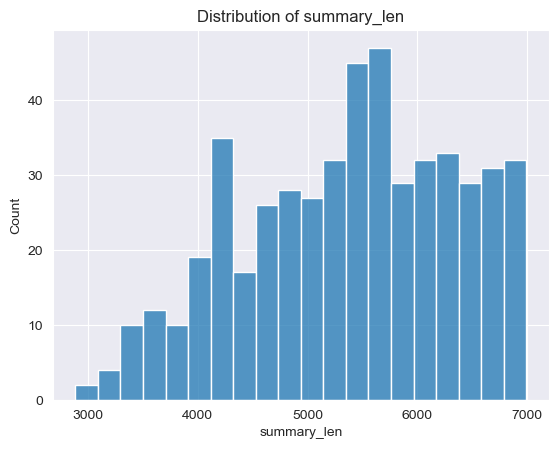

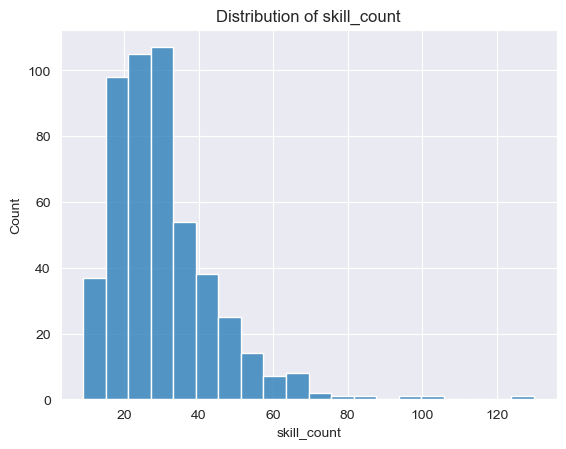

In [17]:
for i in numerical_columns:
    plot_histogram(df, i, log_scale=False)

### Categorical columns

#### Null value report

In [18]:
null_value_report(df[categorical_columns])

,column,Count,Percentage
0,job_title,0,0.0
1,company,0,0.0
2,job_location,0,0.0
3,search_city,0,0.0
4,search_country,0,0.0
5,search_position,0,0.0
6,job_level,0,0.0
7,job_type,0,0.0


#### Statistics

In [19]:
df[categorical_columns].describe(include=['object'])

,job_title,company,job_location,search_city,search_country,search_position,job_level,job_type
count,500,500,500,500,500,500,500,500
unique,50,452,328,275,4,150,2,2
top,Audit Manager,Jobs for Humanity,"Washington, DC",Alexandria,United States,Agricultural-Research Engineer,Mid senior,Onsite
freq,10,5,15,10,432,46,408,498


#### Count plots

In [20]:
def plot_count(df, col):
    sns.set_style('darkgrid')
    
    # 1. Create a DataFrame for the **global** category percentages
    percentage_df = (
        df[col]
        .value_counts(normalize=True)  # Proportion of each category
        .mul(100)                      # Convert to percentage
        .rename("percentage")          # Name the column "percentage"
        .reset_index()                 # Convert series to DataFrame
        .rename(columns={"index": col}) # Rename the index column to our category name
    )
    
    # 2. Get the top 20 most frequent categories in the entire dataset
    top_categories = df[col].value_counts().nlargest(20).index.tolist()
    
    # 3. Filter the original DataFrame to include only those top 20 categories
    filtered_df = df[df[col].isin(top_categories)]
    
    # 4. Create the countplot using `order=top_categories`
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")
    
    # 5. Annotate each bar with the **global** percentage
    for i, patch in enumerate(ax.patches):
        # The i-th patch corresponds to the i-th category in `top_categories`
        category = top_categories[i]
        
        # Retrieve the global percentage for this category from the percentage_df
        pct_value = percentage_df.loc[percentage_df[col] == category, "percentage"].values[0]
        
        # Bar dimensions
        bar_length = patch.get_width()  # How long the bar is (i.e., the count in `filtered_df`)
        y_center = patch.get_y() + patch.get_height() / 2  # Vertical center of the bar

        # Place the annotation a bit to the right of the bar
        ax.annotate(f"{pct_value:.1f}%", (bar_length, y_center), xytext=(5, 0), textcoords="offset points", ha="left", va="center", fontsize=10, color="black")

    # 6. Final touches: title, labels, layout
    plt.title(f"Top 20 Most Frequent Categories - {col}", fontsize=16)
    plt.xlabel("Count", fontsize=14)
    plt.ylabel(col, fontsize=14)
    plt.tight_layout()
    plt.show()

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_59710/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


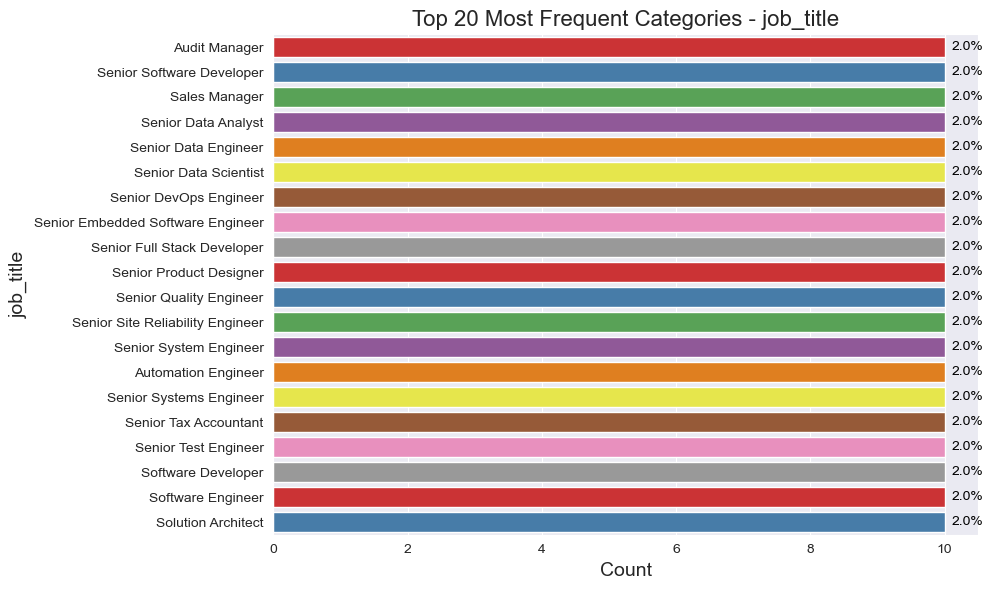

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_59710/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


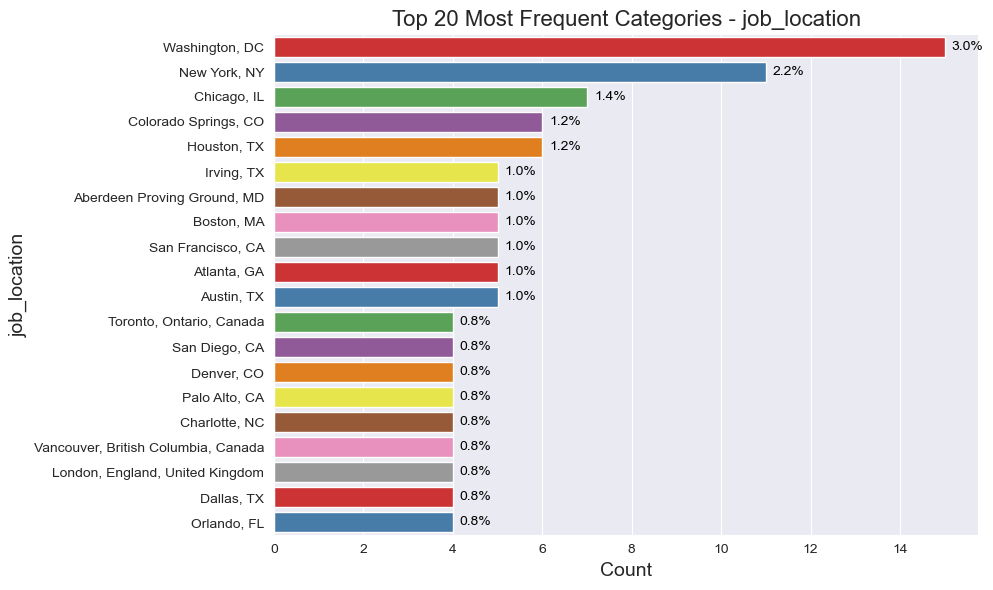

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_59710/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


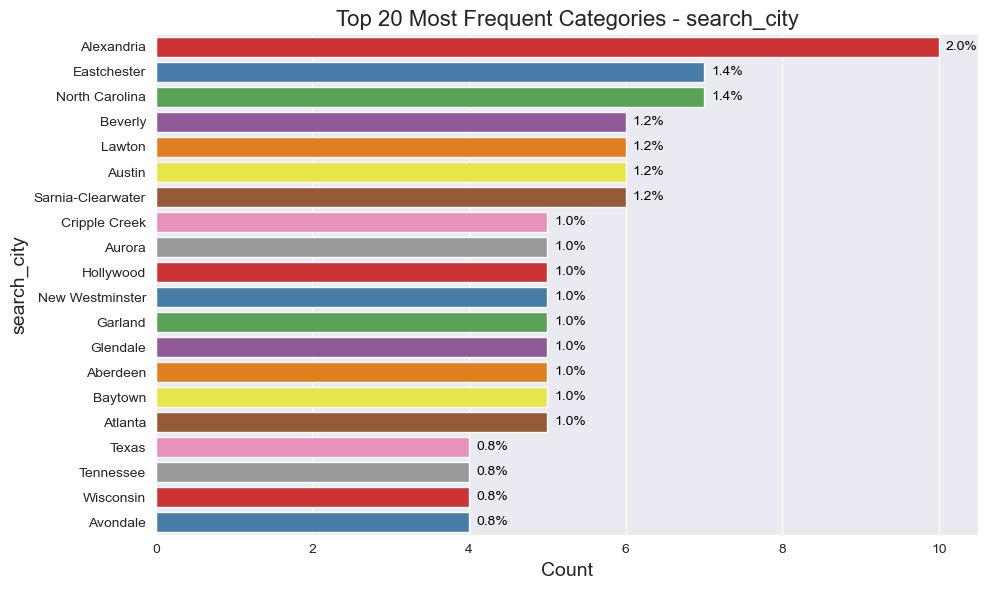

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_59710/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


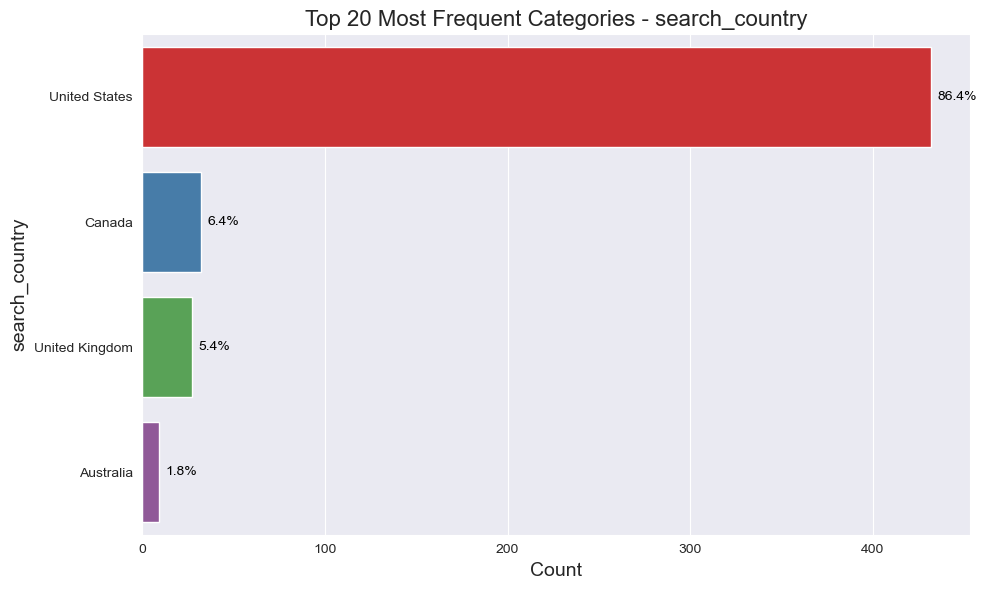

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_59710/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


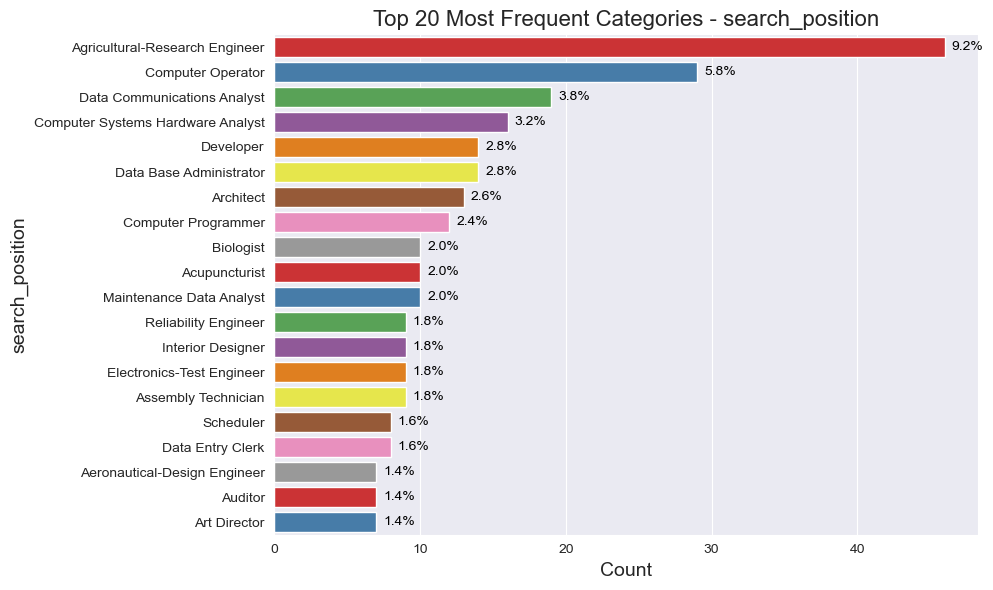

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_59710/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


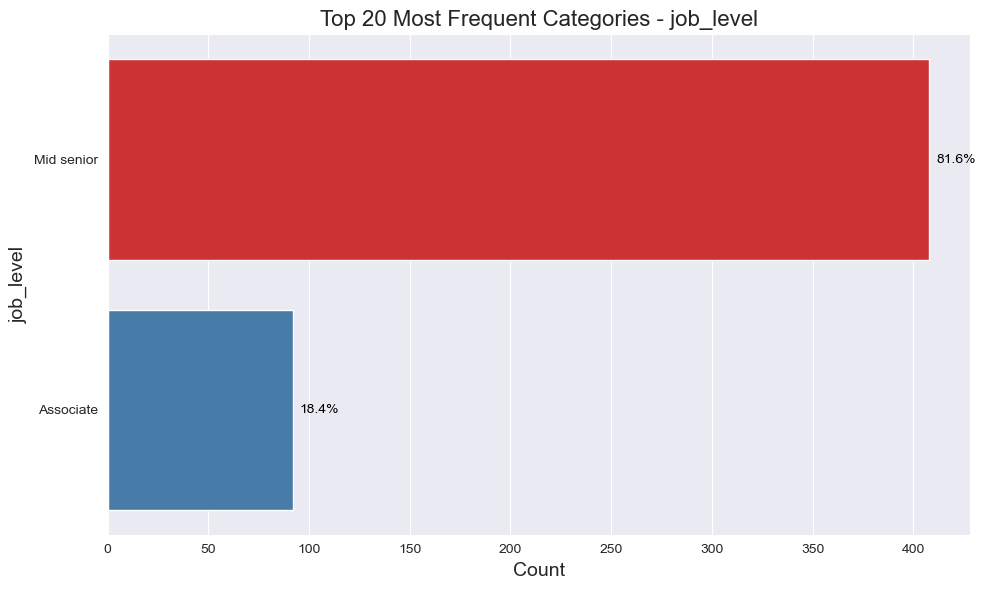

/var/folders/t5/tflj5hjs197_vv37fw2sdhdr0000gn/T/ipykernel_59710/8671764.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=filtered_df, y=col, order=top_categories, palette="Set1")


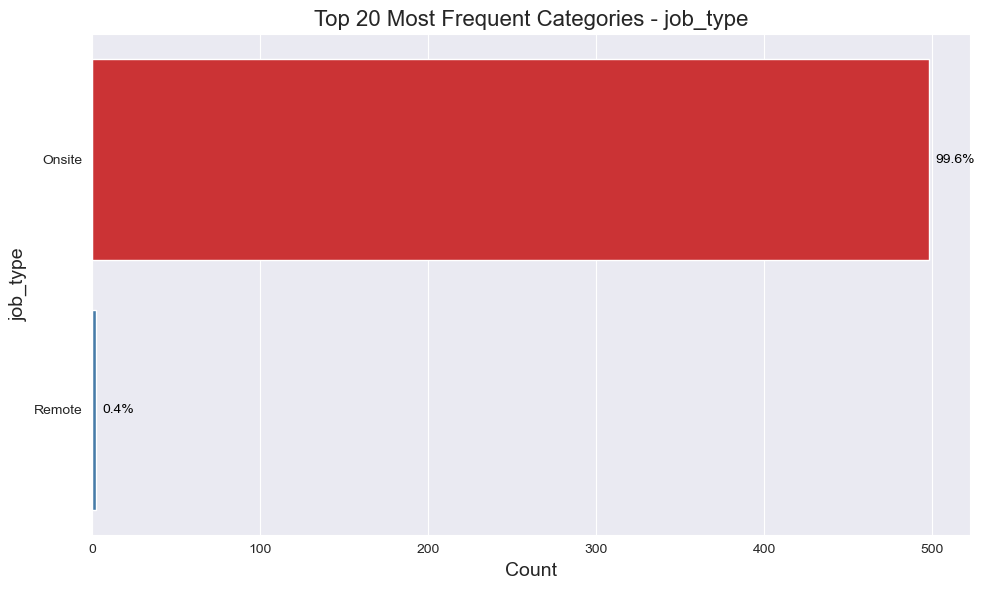

In [21]:
for i in categorical_columns:
    if(df[i].nunique() / df.shape[0] < 0.9):
        plot_count(df, i)

### Text columns

#### Null value report

In [22]:
null_value_report(df[text_columns])

,column,Count,Percentage
0,job_skills,0,0.0
1,job_summary,0,0.0


## Cosine similarity for text columns

In [23]:
def get_similarity_percentage(col_data, threshold=0.3):
    # Create TF-IDF vectors
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(col_data)
    
    # Compute cosine similarity
    cosine_sim = cosine_similarity(tfidf_matrix)
    
    # Create a mask for the upper triangle (excluding diagonal)
    n = cosine_sim.shape[0]
    mask = np.triu(np.ones((n, n)), k=1).astype(bool)
    
    # Count pairs above threshold in upper triangle
    num_similar_pairs = np.sum(cosine_sim[mask] > threshold)
    
    # Total number of unique pairs
    total_unique_pairs = n * (n - 1) // 2
    
    # Calculate percentage
    percentage_instances = (num_similar_pairs / total_unique_pairs) * 100
    
    return percentage_instances

In [24]:
thresholds = np.arange(0, 1.1, 0.1)
for thresh in thresholds:
    print(f"Percentage of Job summaries that are similar with each other (cosine similarity > {thresh}) are: ", get_similarity_percentage(df['job_summary'], thresh))

Percentage of Job summaries that are similar with each other (cosine similarity > 0.0) are:  100.0
Percentage of Job summaries that are similar with each other (cosine similarity > 0.1) are:  99.6008016032064
Percentage of Job summaries that are similar with each other (cosine similarity > 0.2) are:  93.45410821643286
Percentage of Job summaries that are similar with each other (cosine similarity > 0.30000000000000004) are:  50.478557114228465
Percentage of Job summaries that are similar with each other (cosine similarity > 0.4) are:  7.346693386773547
Percentage of Job summaries that are similar with each other (cosine similarity > 0.5) are:  0.4945891783567134
Percentage of Job summaries that are similar with each other (cosine similarity > 0.6000000000000001) are:  0.07294589178356714
Percentage of Job summaries that are similar with each other (cosine similarity > 0.7000000000000001) are:  0.029659318637274546
Percentage of Job summaries that are similar with each other (cosine sim

We can see that the ~50% of the pairs have cosine similarity greater than 0.3. This is expected behavior as there are similar job titles in the data

In [25]:
for thresh in thresholds:
    print(f"Percentage of Job Skills that are similar with each other (cosine similarity > {thresh}) are: ", get_similarity_percentage(df['job_skills'], thresh))

Percentage of Job Skills that are similar with each other (cosine similarity > 0.0) are:  93.12865731462927
Percentage of Job Skills that are similar with each other (cosine similarity > 0.1) are:  13.229659318637275
Percentage of Job Skills that are similar with each other (cosine similarity > 0.2) are:  2.6476953907815632
Percentage of Job Skills that are similar with each other (cosine similarity > 0.30000000000000004) are:  0.7663326653306614
Percentage of Job Skills that are similar with each other (cosine similarity > 0.4) are:  0.22925851703406813
Percentage of Job Skills that are similar with each other (cosine similarity > 0.5) are:  0.06092184368737475
Percentage of Job Skills that are similar with each other (cosine similarity > 0.6000000000000001) are:  0.011222444889779559
Percentage of Job Skills that are similar with each other (cosine similarity > 0.7000000000000001) are:  0.0032064128256513026
Percentage of Job Skills that are similar with each other (cosine similarity

Even though the job_titles are similar, there are ~13% pairs that have cosine similarity greater than 0.1, which is a good thing 